In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import comb
import random
import statistics
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

In [2]:
column_names = ['x','y','cluster']
df = pd.read_csv('spiral-dataset.csv', names=column_names, sep=',')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        312 non-null    float64
 1   y        312 non-null    float64
 2   cluster  312 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.4 KB


,x,y,cluster
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [63]:
def rand_index(actual, pred):

    tp_plus_fp = comb(np.bincount(actual), 2).sum()
    tp_plus_fn = comb(np.bincount(pred), 2).sum()
    A = np.c_[(actual, pred)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(actual))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [48]:
#In the below function, hierarchial clustering for all the 4 linkages('single', 'complete', 'average', 'centroid') along with 3 given distance metrics('eucledian','Cosine', 'L3') are defined
def Heirarchical(data, cutoff, linkage, distance_metric):
    
    if distance_metric == 'eucledian':
        if linkage == "centroid":
            distance_matrix = pairwise_distances(data -[np.mean(data,axis =0)], data - [np.mean(data,axis =0 )],metric = "manhattan")
            print(distance_matrix)
        else:
            distance_matrix = euclidean_distances(data, data)
    elif distance_metric == 'cosine':
        distance_matrix = cosine_similarity(data, data)
    
    elif distance_metric == 'L3':
        distance_matrix = pairwise_distances(data, Y=None, metric='minkowski', p=3)

    distance_matrix = np.tril(distance_matrix)
    distance_matrix[distance_matrix==0] = np.inf
    
   
    df = pd.DataFrame(data=np.ones(data.shape[0])*np.inf)
                      
    if (cutoff > distance_matrix.shape[0]):
        cutoff = distance_matrix.shape[0]
    if linkage == "single":
        d = {}
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
           
            if i == 0:
                print(df.iloc[ij_min[0]])
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
             
            d[i] = ij_min
            for j in range(0, ij_min[0]):
                if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                   
                    distance_matrix[ij_min[1]][j] = min(distance_matrix[ij_min[0]][j], distance_matrix[ij_min[1]][j])
            distance_matrix[ij_min[0]] = np.inf
        return d, df[0].to_numpy()
    elif linkage == "complete":
        d_complete = {}
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
            if i == 0:
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            d_complete[i] = ij_min
            for j in range(0, ij_min[0]):
                if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                    distance_matrix[ij_min[1]][j] = max(distance_matrix[ij_min[0]][j], distance_matrix[ij_min[1]][j])
            distance_matrix[ij_min[0]] = np.inf
        return d_complete, df[0].to_numpy()
    elif linkage == "average":
        d_average = {}
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
            if i == 0:
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            d_average[i] = ij_min
            for j in range(0, ij_min[0]):
                if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                    distance_matrix[ij_min[1]][j] = statistics.mean([distance_matrix[ij_min[0]][j], distance_matrix[ij_min[1]][j]])
            distance_matrix[ij_min[0]] = np.inf
        return d_average, df[0].to_numpy()

    elif linkage == "centroid":
        d_centroid = {}
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
            if i == 0:
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            d_centroid[i] = ij_min
            distance_matrix[ij_min[0]] = np.inf
        
    return d_centroid, df[0].to_numpy()

In [50]:
clusters = len(df['x'].values)-3
print(clusters)

309


### Implementing 3a, 3b, 3c, 3d

In [86]:
output = []
mean = []

linkage_list = ["single", "complete", "average", "centroid"]
for i in linkage_list:
    print(i)
    d, target = Heirarchical(df.loc[:,['x','y']].values ,clusters, i, "eucledian")
    #print('mean : ',mean)
    print(target)
    output.append(target)
    #mean.append(d)

single
0    inf
Name: 101, dtype: float64
[305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305.
 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305.
 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305.
 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305.
 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305.
 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305.
 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305. 305.
 305. 305. 305. 305. 305. 305. 305. 305. 307. 307. 307. 307. 307. 307.
 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307.
 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307.
 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307.
 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307.
 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307.
 307. 307. 307. 307. 307. 307. 307.

In [87]:
print(len(output))

4


In [88]:
#assigning cluster names to the output
for i in range(0,len(output)):
    if i==0:
        tmp = output[i]
        tmp[tmp == 307] = 1
        tmp[tmp == 308] = 2
        tmp[tmp == 305] = 3
        output[i] = tmp
    elif i==1:
        tmp = output[i]
        tmp[tmp == 307] = 1
        tmp[tmp == 301] = 2
        tmp[tmp == 308] = 3
        output[i] = tmp
    
    elif i==2:
        tmp = output[i]
        tmp[tmp == 307] = 1
        tmp[tmp == 308] = 2
        tmp[tmp == 306] = 3
        output[i] = tmp
        
    elif i==3:
        tmp = output[i]
        tmp[tmp == 304] = 1
        tmp[tmp == 307] = 2
        tmp[tmp == 308] = 3
        output[i] = tmp
        
    output[i] = output[i].astype(int)
        

In [89]:
print(output)

[array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [90]:
for i in range(0,len(output)):
    df[linkage_list[i]] = output[i]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         312 non-null    float64
 1   y         312 non-null    float64
 2   cluster   312 non-null    int64  
 3   single    312 non-null    int32  
 4   complete  312 non-null    int32  
 5   average   312 non-null    int32  
 6   centroid  312 non-null    int32  
dtypes: float64(2), int32(4), int64(1)
memory usage: 12.3 KB


,x,y,cluster,single,complete,average,centroid
0,31.95,7.95,3,3,3,1,3
1,31.15,7.30,3,3,3,1,3
2,30.45,6.65,3,3,3,1,3
3,29.70,6.00,3,3,3,1,3
4,28.90,5.55,3,3,3,1,3


In [91]:
df['cluster'].values

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### Implementing 3e, MS2, MS3

In [94]:
#SSE
for i in range(0,len(output)):
    print(linkage_list[i])
    for j in df[linkage_list[i]].unique():
        print(j)
        df.groupby([''])

single
3
1
2
complete
3
1
2
average
1
2
3
centroid
3
1
2


In [83]:
#Rand_Index
for i in range(0,len(output)):
    print('Linkage type used : ',linkage_list[i])
    print('Rand Index : ', rand_index(df['cluster'].values.astype('int'), output[i]))

Linkage type used :  single
Rand Index :  1.0
Linkage type used :  complete
Rand Index :  1.0
Linkage type used :  average
Rand Index :  1.0
Linkage type used :  centroid
Rand Index :  1.0


Linkage type used :  single


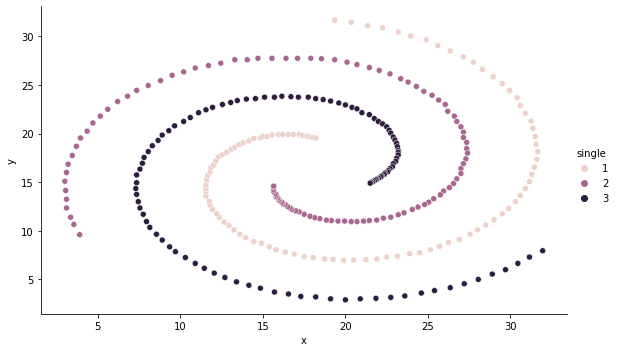

Linkage type used :  complete


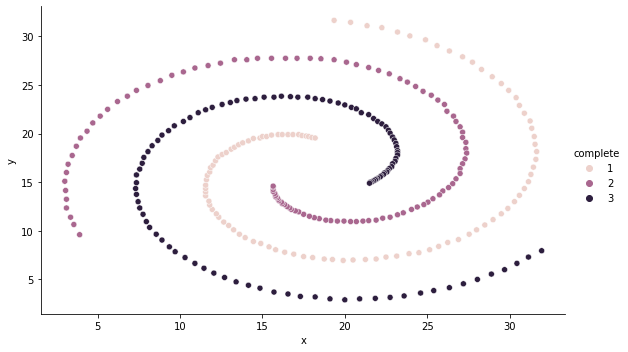

Linkage type used :  average


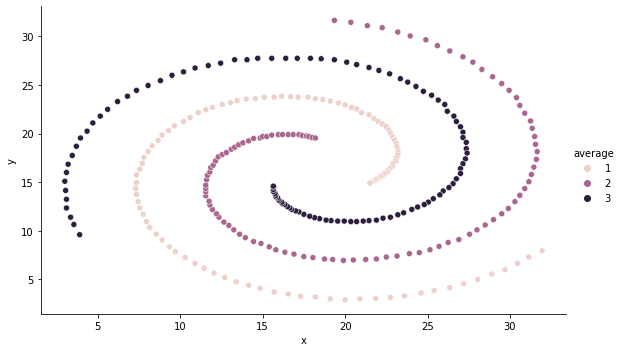

Linkage type used :  centroid


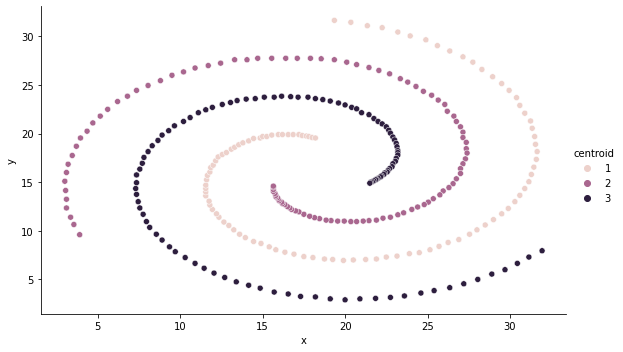

In [95]:
#visualization 
for i in range(0,len(output)):
    print('Linkage type used : ',linkage_list[i])
    m = linkage_list[i]
    sns.relplot(data=df, x='x', y='y', hue=m, aspect=1.61)
    #plt.scatter(new_mean[:,0],new_mean[:,1],s=100,c='yellow',label='Centroids')
    plt.show()

Linkage type used :  single


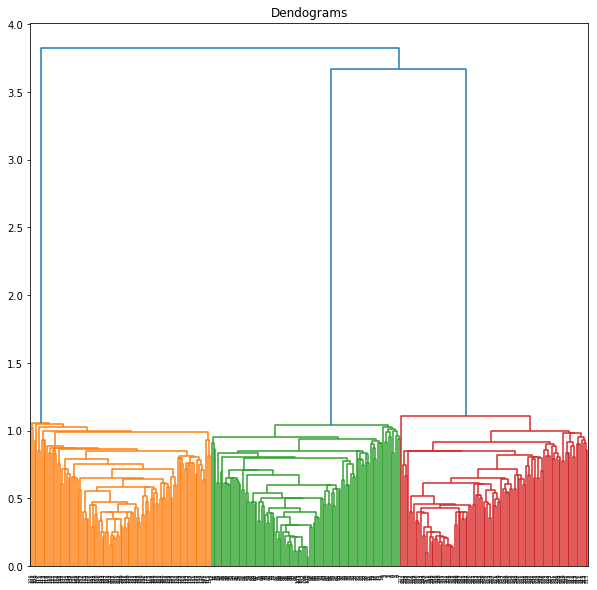

Linkage type used :  complete


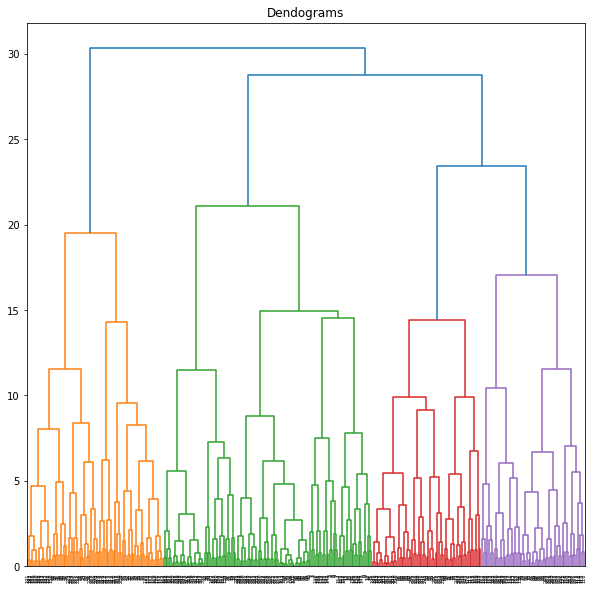

Linkage type used :  average


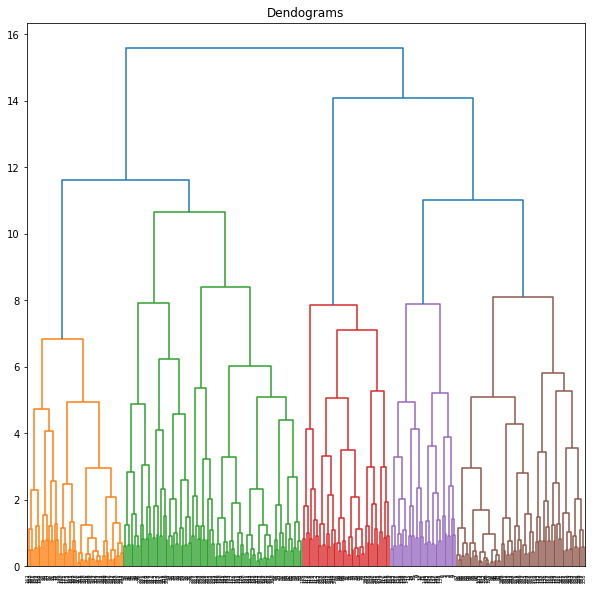

Linkage type used :  centroid


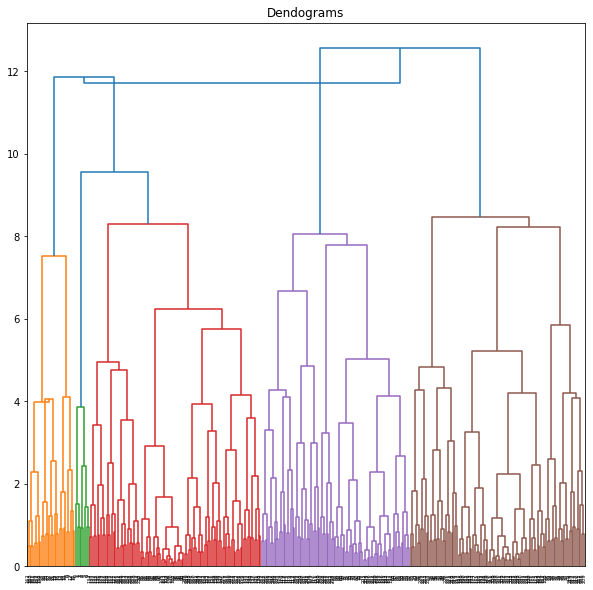

In [101]:
#Dendrogram
import scipy.cluster.hierarchy as shc
for i in linkage_list:
    print('Linkage type used : ',i)
    plt.figure(figsize=(10,10))
    plt.title("Dendograms")
    dend = shc.dendrogram(shc.linkage(df.loc[:,['x','y']], method=i))
    plt.show()

### MS4

In [102]:
df_cosine = df.copy()

In [103]:
### Implementing MS4
output_cosine = []
linkage_list = ["single", "complete", "average", "centroid"]
for i in linkage_list:
    print(i)
    d, target = Heirarchical(df.loc[:,['x','y']].values ,clusters, i, "cosine")
    print(target)
    output_cosine.append(target)

single
0    inf
Name: 215, dtype: float64
[308.  inf  inf  inf 308. 308. 308. 308. 308. 308. 308. 304. 308. 308.
 308. 308. 308. 308. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304.
 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304.
 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304.
 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304.
 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304.
 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304.
 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304.
 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304.
 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304.
 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304.
 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304.
 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304. 304.
 304. 304. 304. 304. 304. 304. 304.

In [108]:
#assigning cluster names to the output
for i in range(0,len(output_cosine)):
    if i==0:
        tmp = output_cosine[i]
        tmp[tmp == 304] = 1
        tmp[tmp < 0] = 2
        tmp[tmp == 308] = 3
        output_cosine[i] = tmp
    elif i==1:
        tmp = output_cosine[i]
        tmp[tmp == 308] = 3
        tmp[tmp == 304] = 1
        tmp[tmp < 0] = 2
        output_cosine[i] = tmp
    
    elif i==2:
        tmp = output_cosine[i]
        tmp[tmp == 304] = 1
        tmp[tmp < 0] = 2
        tmp[tmp == 308] = 3
        output_cosine[i] = tmp
        
    elif i==3:
        tmp = output_cosine[i]
        tmp[tmp == 304] = 1
        tmp[tmp < 0] = 2
        tmp[tmp == 308] = 3
        output_cosine[i] = tmp
        
    output_cosine[i] = output_cosine[i].astype(int)
        

In [109]:
for i in range(0,len(output_cosine)):
    df_cosine[linkage_list[i]] = output_cosine[i]
df_cosine.info()
df_cosine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         312 non-null    float64
 1   y         312 non-null    float64
 2   cluster   312 non-null    int64  
 3   single    312 non-null    int32  
 4   complete  312 non-null    int32  
 5   average   312 non-null    int32  
 6   centroid  312 non-null    int32  
dtypes: float64(2), int32(4), int64(1)
memory usage: 12.3 KB


,x,y,cluster,single,complete,average,centroid
0,31.95,7.95,3,3,3,2,3
1,31.15,7.30,3,2,2,2,2
2,30.45,6.65,3,2,2,2,2
3,29.70,6.00,3,2,3,2,3
4,28.90,5.55,3,3,3,2,3


In [111]:
#Rand_Index
for i in range(0,len(output_cosine)):
    print('Linkage type used : ',linkage_list[i])
    print('Rand Index : ', rand_index(df_cosine['cluster'].values.astype('int'), output_cosine[i]))

Linkage type used :  single
Rand Index :  0.3714650836837332
Linkage type used :  complete
Rand Index :  0.33553879132657266
Linkage type used :  average
Rand Index :  0.372330777475472
Linkage type used :  centroid
Rand Index :  0.33553879132657266


Linkage type used :  single


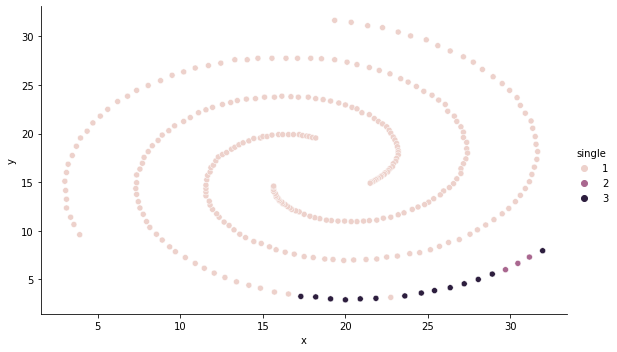

Linkage type used :  complete


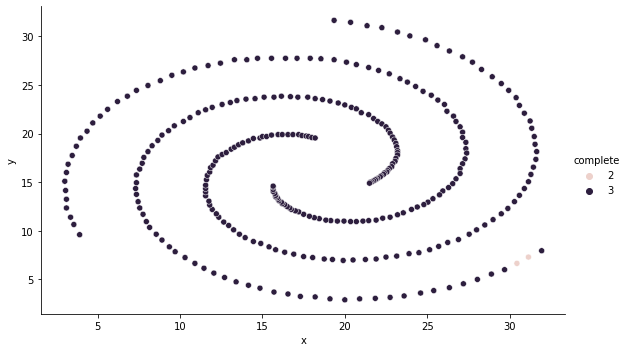

Linkage type used :  average


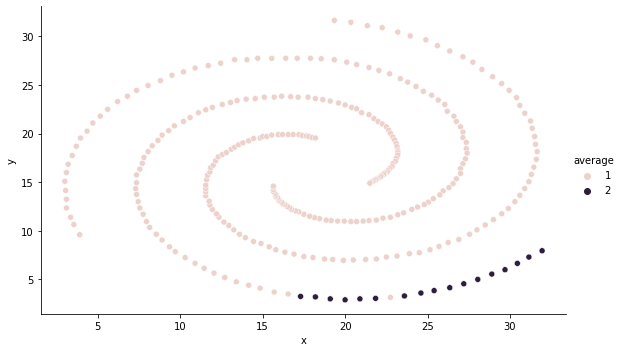

Linkage type used :  centroid


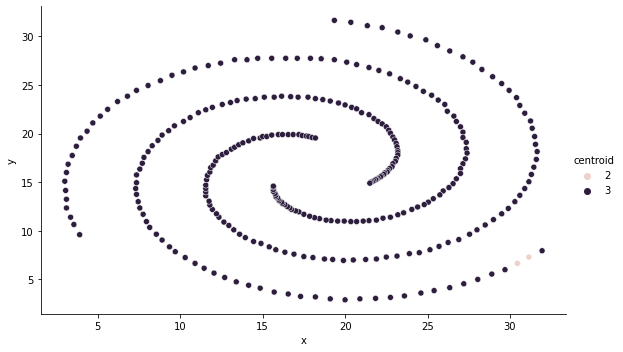

In [112]:
#visualization 
for i in range(0,len(output)):
    print('Linkage type used : ',linkage_list[i])
    m = linkage_list[i]
    sns.relplot(data=df_cosine, x='x', y='y', hue=m, aspect=1.61)
    #plt.scatter(new_mean[:,0],new_mean[:,1],s=100,c='yellow',label='Centroids')
    plt.show()

Linkage type used :  single


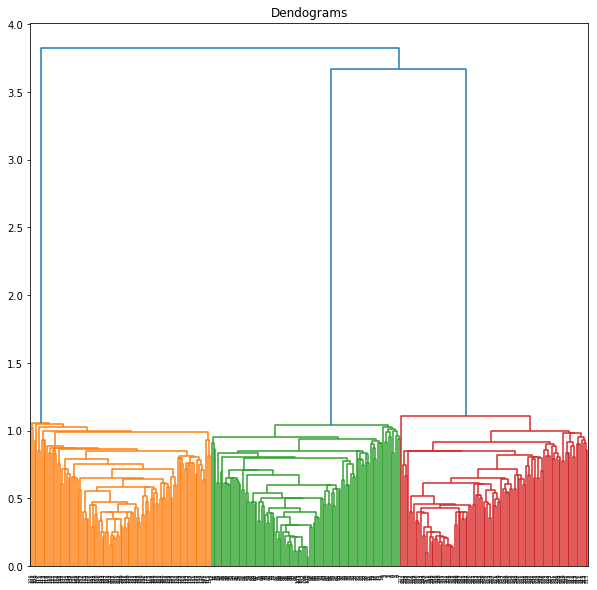

Linkage type used :  complete


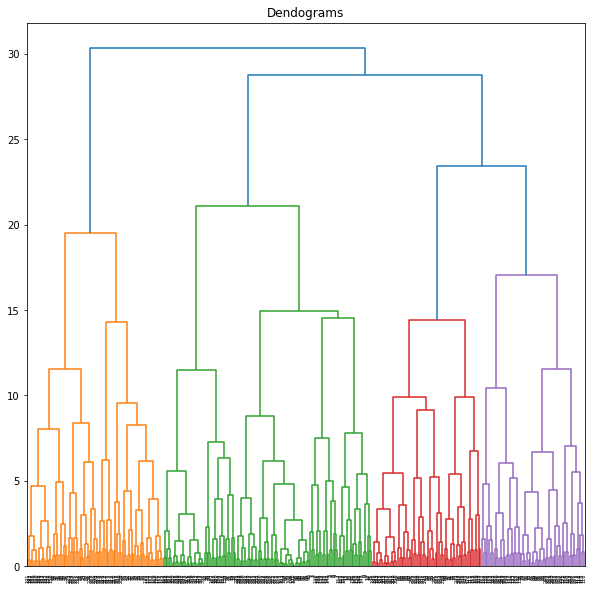

Linkage type used :  average


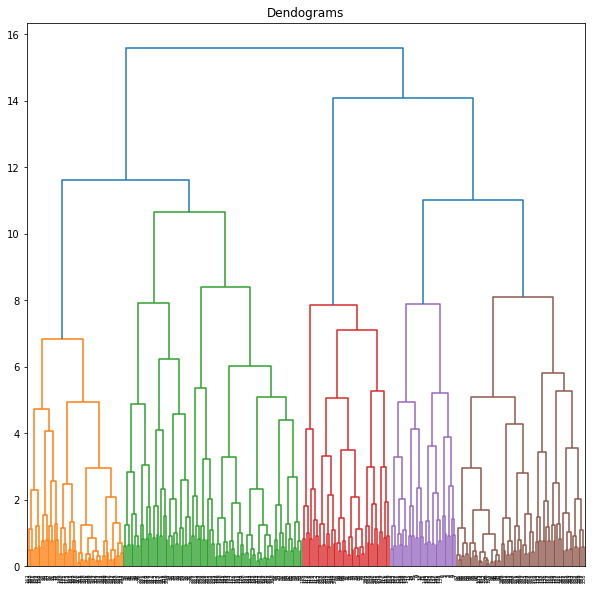

Linkage type used :  centroid


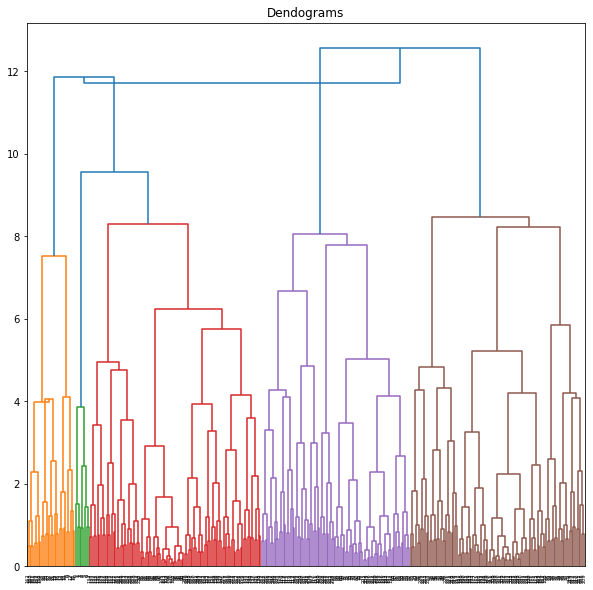

In [113]:
#Dendrogram
import scipy.cluster.hierarchy as shc
for i in linkage_list:
    print('Linkage type used : ',i)
    plt.figure(figsize=(10,10))
    plt.title("Dendograms")
    dend = shc.dendrogram(shc.linkage(df_cosine.loc[:,['x','y']], method=i))
    plt.show()

### MS5

In [104]:
df_L3 = df.copy()

In [114]:
### Implementing MS5
output_L3 = []
linkage_list = ["single", "complete", "average", "centroid"]
for i in linkage_list:
    print(i)
    d, target = Heirarchical(df_L3.loc[:,['x','y']].values ,clusters, i, "L3")
    print(target)
    output_L3.append(target)

single
0    inf
Name: 101, dtype: float64
[306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306.
 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306.
 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306.
 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306.
 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306.
 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306.
 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306. 306.
 306. 306. 306. 306. 306. 306. 306. 306. 307. 307. 307. 307. 307. 307.
 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307.
 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307.
 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307.
 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307.
 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307. 307.
 307. 307. 307. 307. 307. 307. 307.

In [117]:
#assigning cluster names to the output
for i in range(0,len(output_L3)):
    if i==0:
        tmp = output_L3[i]
        tmp[tmp == 307] = 3
        tmp[tmp == 308] = 1
        tmp[tmp == 306] = 2
        output_L3[i] = tmp
    elif i==1:
        tmp = output_L3[i]
        tmp[tmp == 307] = 3
        tmp[tmp == 308] = 1
        tmp[tmp == 306] = 2
        output_L3[i] = tmp
    
    elif i==2:
        tmp = output_L3[i]
        tmp[tmp == 307] = 3
        tmp[tmp == 308] = 1
        tmp[tmp == 306] = 2
        output_L3[i] = tmp
        
    elif i==3:
        tmp = output_L3[i]
        tmp[tmp == 307] = 3
        tmp[tmp == 308] = 1
        tmp[tmp == 306] = 2
        output_L3[i] = tmp
        
    output_L3[i] = output_L3[i].astype(int)
        

In [118]:
for i in range(0,len(output_L3)):
    df_L3[linkage_list[i]] = output_L3[i]
df_L3.info()
df_L3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         312 non-null    float64
 1   y         312 non-null    float64
 2   cluster   312 non-null    int64  
 3   single    312 non-null    int32  
 4   complete  312 non-null    int32  
 5   average   312 non-null    int32  
 6   centroid  312 non-null    int32  
dtypes: float64(2), int32(4), int64(1)
memory usage: 12.3 KB


,x,y,cluster,single,complete,average,centroid
0,31.95,7.95,3,2,3,2,2
1,31.15,7.30,3,2,3,2,2
2,30.45,6.65,3,2,3,2,2
3,29.70,6.00,3,2,3,2,2
4,28.90,5.55,3,2,3,2,2


In [119]:
#Rand_Index
for i in range(0,len(output_L3)):
    print('Linkage type used : ',linkage_list[i])
    print('Rand Index : ', rand_index(df_L3['cluster'].values.astype('int'), output_L3[i]))

Linkage type used :  single
Rand Index :  0.781412317585951
Linkage type used :  complete
Rand Index :  0.7793305301343887
Linkage type used :  average
Rand Index :  0.781412317585951
Linkage type used :  centroid
Rand Index :  0.781412317585951


Linkage type used :  single


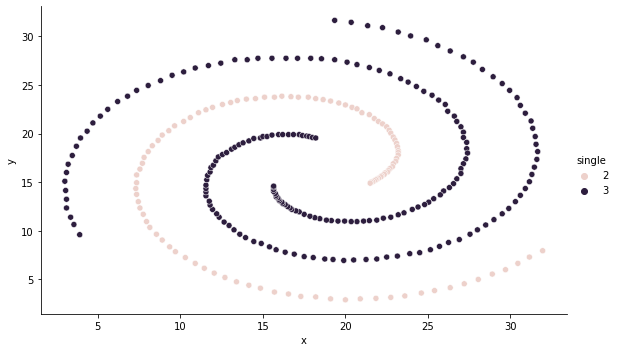

Linkage type used :  complete


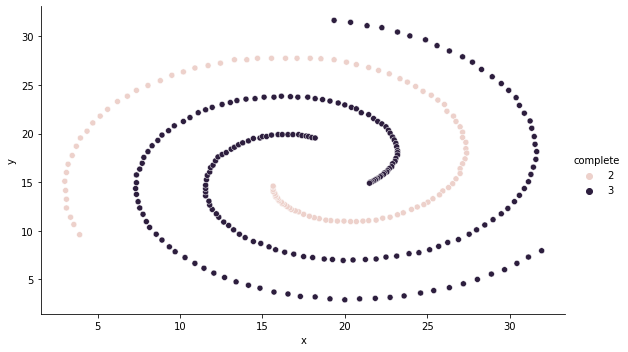

Linkage type used :  average


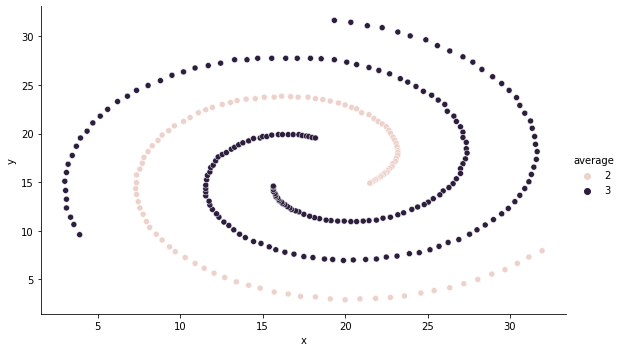

Linkage type used :  centroid


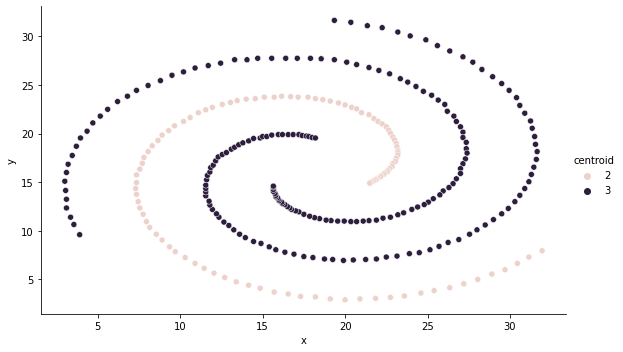

In [120]:
#visualization 
for i in range(0,len(output_L3)):
    print('Linkage type used : ',linkage_list[i])
    m = linkage_list[i]
    sns.relplot(data=df_L3, x='x', y='y', hue=m, aspect=1.61)
    #plt.scatter(new_mean[:,0],new_mean[:,1],s=100,c='yellow',label='Centroids')
    plt.show()

Linkage type used :  single


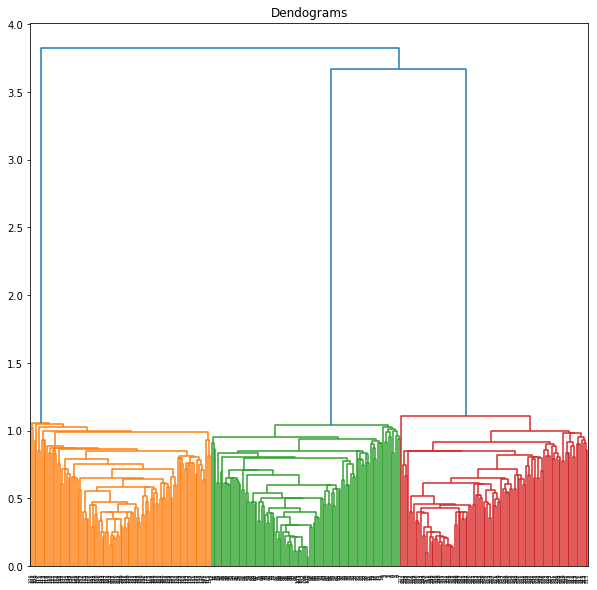

Linkage type used :  complete


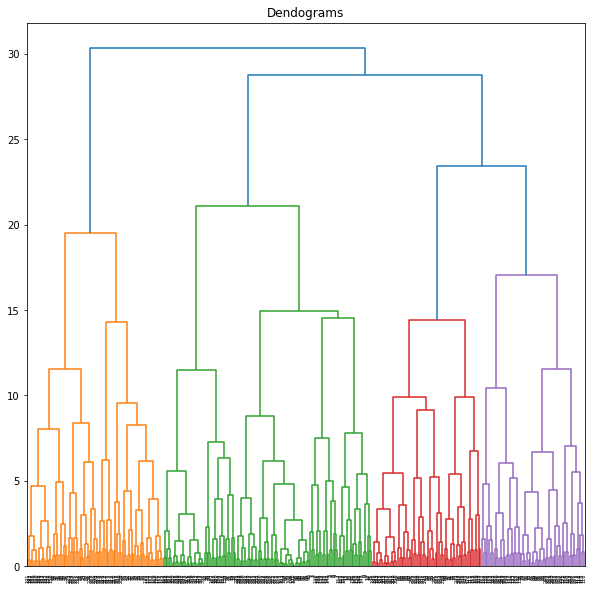

Linkage type used :  average


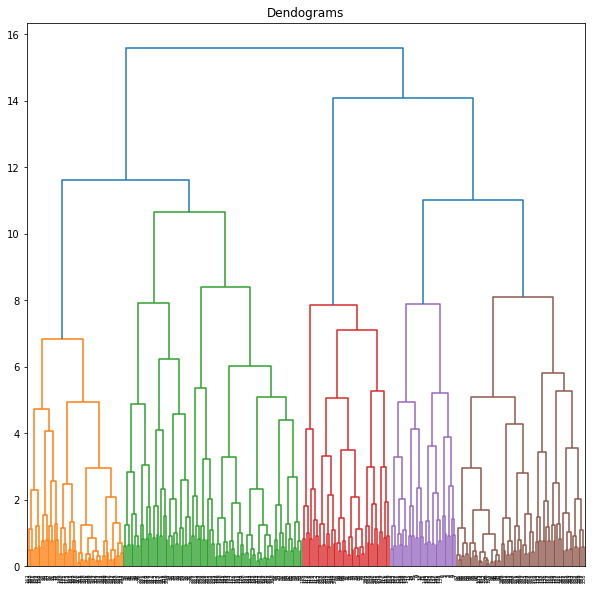

Linkage type used :  centroid


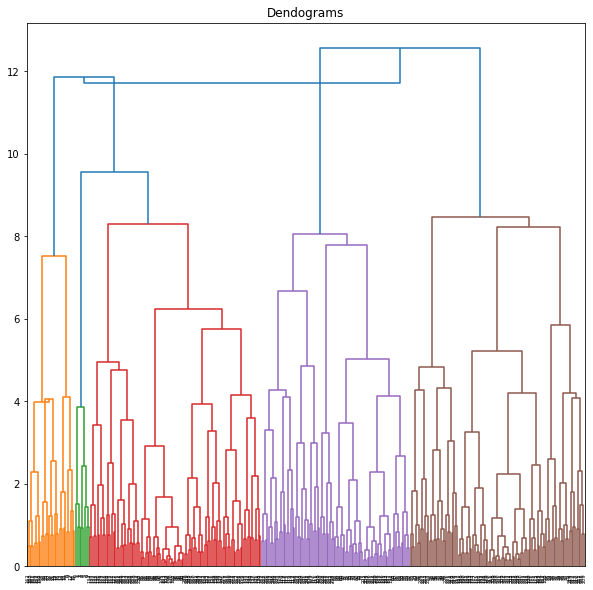

In [121]:
#Dendrogram
import scipy.cluster.hierarchy as shc
for i in linkage_list:
    print('Linkage type used : ',i)
    plt.figure(figsize=(10,10))
    plt.title("Dendograms")
    dend = shc.dendrogram(shc.linkage(df_L3.loc[:,['x','y']], method=i))
    plt.show()